# Gurugram, India - Food for Thoughts !!!

## Table of Contents

* [Objective](#Objective)
* [Data Source and Analysis](#Data_Source)
* [Data Cleaning](#Cleaning)
* [Methodolgy Used](#MethodologyUsed)
* [Data Analysis](#DataAnalysis)
* [Results](#results)
* [Conclusion](#conclusion)

## Objective <a name="Objective"></a>

Idea behind this project is analysing restaurants in Gurugram, a city located in the northern Indian state of Haryana. It is one of the major satellite cities of Delhi and known for giant hub of multinational companies, numerous shopping malls and variety of best restaurants serving Indian as well as famous world class cuisines. This project focus on comparison of top-rated restaurants in Gurugram city based upon their average food price and also the customer ratings provided. 
This project is intended for 
* **Foodies** who want to try out new food place and like to identify best restaurant of their budget and preferences.
* **Investors** who want to start a new establishment and want to compare restaurants in particular area
* **Food critics** who may use this prototype, enhance and customize its functionality and develop it further for their commercial usage.   


## Data Source and Data Analysis<a name="Data_Source"></a>

I have used **Places API from FourSquare** which is having a good source of relevant data and **Zomato API** which was launched in India around 10 year back and is a data warehouse of huge information on Dine-in and Deliveries restaurants. On a similar pattern, APIs of **Urban Piper, Swiggy, UberEATS or Food Panda** can also be used to enhance the comparison and result. **Foursquare** is being used to identify location of restaurants based upon its Map locations API data.  Map location API data is fed to Zomato and Urban Piper to retrieve individual restaurant’s specific information on food quality, price, rating and locations etc.

### I have used **'Geopy' library** to identify location details of **'Gurugram'** City

In [1]:
!conda install -c conda-forge geopy --yes # Installing Geopy to use location library

Solving environment: done

# All requested packages already installed.



In [2]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

### Geopy Library to display 'Gurugram' city Latitude and Longitude

In [3]:
address = 'Gurugram City, IN'
geolocator = Nominatim(user_agent="vn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of '+ address+' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Gurugram City, IN are 28.4646148, 77.0299194.


### Folium Library to display 'Gurugram' city Map
Below code will display Gurugram City Map using **`folium library'**. The map is zoomed onto a level 14 which provide a perfect look to identify main locations in **'Gurugram City'**. A marker is placed on 'Gurugram' city.

In [4]:
import folium

cityMap = folium.Map(location = [latitude, longitude], zoom_start = 14)
folium.Marker([latitude, longitude]).add_to(cityMap)
cityMap.save("../Gurugram/maps/1_GurugramMap.png")
cityMap

### Foursquare API to display main venue in 'Gurugram City'

I have used 'FourSquar API' to highlight all the venue within a specified radius using developer client id provided by 'FourSquare' for its non commercial use.

In [5]:
FOURSQUARE_CLIENT_ID = '<CLIENT_ID>'
FOURSQUARE_CLIENT_SECRET = '<CLIENT_SECRET>'
RADIUS = 5000 # 5 Km
NO_OF_VENUES = 100
VERSION = '20200420' # Current date

I have created a user defined method `get_category_type` which will accept a single folium api result row as input and mark correct category for each venue.

In [6]:
def getCategoryType(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Below piece of code import python major library used in this project

In [7]:
import numpy as np #importing numpy library
import pandas as pd # importing panda library

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

Following code performs below functions:
1. creates a FourSquare URL to invoke its 'Explore API' using GET client
2. Data filteration and cleanliness : It parse the JSON response and fileter them into four columns (Name, Category and Location (Latitude,Longitude)

In [8]:
from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)
offset = 0
total_venues = 0
gurugramVenues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        latitude, 
                                                                        longitude, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)
    
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(getCategoryType, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    gurugramVenues = pd.concat([gurugramVenues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

gurugramVenues = gurugramVenues.reset_index(drop = True)
print("Area Covered: {} km ".format(RADIUS/1000))
print("Total number of different Venue's details retreived: {}".format(total_venues))
gurugramVenues.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Area Covered: 5.0 km 
Total number of different Venue's details retreived: 121


,name,categories,lat,lng
0,Cocktails and Dreams Speakeasy,Bar,28.457921,77.044597
1,Leisure Valley,Park,28.469142,77.064690
2,Crowne Plaza,Hotel,28.468254,77.059928
3,The World Spa,Residential Building (Apartment / Condo),28.460302,77.058074
4,Kingdom Of Dreams,General Entertainment,28.468011,77.068125
5,Dunkin',Donut Shop,28.443370,77.055967
6,The Monk,Chinese Restaurant,28.463142,77.049037
7,Vivanta by Taj,Hotel,28.455952,77.070524
8,Downtown,Brewery,28.468474,77.062988
9,Roots - Cafe in the Park,Café,28.469500,77.068264


### Using Zomato API to search selected venue based upon its name and location details using non commercial developer key
I have used Zomato API to identify details of selected venue. Below is given set of Input and Output for this API 

   **Input:** Venue name and its location (latitude, longitude)

   **Output:** Venue name, its location (latitude, longitude), Average Cost for twp person, Price Range, User rating and its address

In [9]:
headers = {'user-key': ''} #user defined key
venueDetails = []

for index, row in gurugramVenues.iterrows():
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venueDetails.append(venue)
    else:
        venueDetails.append(np.zeros(6))
    
zmVenuesDf = pd.DataFrame(venueDetails, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])
zmVenuesDf.head()

,venue,latitude,longitude,price_for_two,price_range,rating,address
0,"Cocktails & Dreams, Speakeasy",28.4579754130,77.0446266979,2500.0,4.0,4.2,"SCO 23, Behind Galaxy Hotel, Sector 15, Gurgaon"
1,Kb Kulfi,28.4682904587,77.0645239949,250.0,1.0,3.6,"Grand Vatika, Leisure Valley Garden, Sector 29..."
2,Connexions - Crowne Plaza,28.4680876809,77.0604440197,2500.0,4.0,3.8,"Crowne Plaza, National Highway 8, Sector 29, G..."
3,Pizza World,28.4695192013,77.0432845876,600.0,2.0,0,"362/2, Mg Road, Near Kalyani Hospital, Sector ..."
4,Chennai - Kingdom of Dreams,28.4684672994,77.0678418875,550.0,2.0,3.6,"Culture Gully, Kingdom of Dreams, Great Indian..."


## Data Cleaning <a name="data_cleaning"></a>

The data from multiple resources might not always align. Thus, it is **important to combine the data retrieved from multiple resources properly**.

We'll first plot the two data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.

We will first plot the Foursquare data on the map.

In [10]:
gurugramMap = folium.Map(location = [latitude, longitude], zoom_start = 14)
for name, lat, lng in zip(gurugramVenues['name'], gurugramVenues['lat'], gurugramVenues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(gurugramMap)  

gurugramMap.save("../Gurugram/maps/2_VenuesByFoursquare.png")
gurugramMap

**Clustered Locations for FourSquare Venues:**
* Sector 29
* Sector 30
* City Centre

Below code identifies clustered locations for Zomato venues

In [11]:
gurugramMap = folium.Map(location = [latitude, longitude], zoom_start = 13)

for venue, address, lat, lng in zip(zmVenuesDf['venue'], zmVenuesDf['address'], 
                                               zmVenuesDf['latitude'], zmVenuesDf['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(gurugramMap)  

gurugramMap.save("../Gurugram/maps/3_ZomatoVenue.png")
gurugramMap

**Clustered Locations for Zomato Venues:**
* Sector 29
* Sector 30
* City Centre - Sector 27
* Sector 12A
* Sector 47

**Data Merging from both sources** - As a best practices, data from multiple sources should be merged. I have merged above data from FourSquare API and Zomato into single source based upon their Longitude and Latitude.

In [12]:
gurugramVenues['lat'] = gurugramVenues['lat'].apply(lambda lat: round(float(lat), 4))
gurugramVenues['lng'] = gurugramVenues['lng'].apply(lambda lng: round(float(lng), 4))
zmVenuesDf['latitude'] = zmVenuesDf['latitude'].apply(lambda lat: round(float(lat), 4))
zmVenuesDf['longitude'] = zmVenuesDf['longitude'].apply(lambda lng: round(float(lng), 4))

In [13]:
dataset = pd.concat([gurugramVenues, zmVenuesDf], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [14]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues.head()

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Cocktails and Dreams Speakeasy,Bar,28.4579,77.0446,"Cocktails & Dreams, Speakeasy",28.4580,77.0446,2500.0,4.0,4.2,"SCO 23, Behind Galaxy Hotel, Sector 15, Gurgaon",0.0001,0.0000
1,Downtown,Brewery,28.4685,77.0630,Downtown - Diners & Living Beer Cafe,28.4683,77.0630,2200.0,4.0,4.4,"SCO 34, Main Market, Sector 29, Gurgaon",-0.0002,0.0000
2,Roots - Cafe in the Park,Café,28.4695,77.0683,Roots - Cafe In The Park,28.4697,77.0684,750.0,2.0,4.1,"Rajiv Gandhi Renewable Energy Park, Leisure Va...",0.0002,0.0001
3,Swagath Restaurant & Bar,Indian Restaurant,28.4700,77.0629,Swagath,28.4698,77.0628,1500.0,3.0,3.7,"SCO 16-17, Main Market, Sector 29, Gurgaon",-0.0002,-0.0001
4,Dana Choga,Indian Restaurant,28.4823,77.0495,Dana Choga,28.4825,77.0495,600.0,2.0,4.9,"5 & 6, Atul Kataria Chowk, Sector 14, Gurgaon",0.0002,0.0000


This step is manually cleaning of data. For eg. Restaurent located at 'SNo.20 Gung The Palace' is having almost the same coordinate as #21 'Startbucks'

In [15]:
selected_venues = selected_venues.drop([0, 20]).reset_index(drop = True)

Calculating cost Per Person from given 'price for two'

In [16]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [17]:
selected_venues.head()

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Brewery,Downtown - Diners & Living Beer Cafe,28.4683,77.0630,4.0,4.4,"SCO 34, Main Market, Sector 29, Gurgaon",1100.0
1,Café,Roots - Cafe In The Park,28.4697,77.0684,2.0,4.1,"Rajiv Gandhi Renewable Energy Park, Leisure Va...",375.0
2,Indian Restaurant,Swagath,28.4698,77.0628,3.0,3.7,"SCO 16-17, Main Market, Sector 29, Gurgaon",750.0
3,Indian Restaurant,Dana Choga,28.4825,77.0495,2.0,4.9,"5 & 6, Atul Kataria Chowk, Sector 14, Gurgaon",300.0
4,Nightclub,Prankster,28.4692,77.0635,3.0,4.1,"Site 8-10, Sector 29, Gurgaon",750.0


Below Code will highlight all the venues which is having a **rating zero**.

In [18]:
selected_venues[selected_venues['rating'] == 0.0]

,categories,venue,latitude,longitude,price_range,rating,address,average_price
12,Resort,Table of Contents,28.4583,77.0670,4.0,0,"Club Patio, Block-E, Near NH 8, South City 1, ...",1000.0
16,Multiplex,Hunger Bite,28.4728,77.0177,1.0,0,"Near Inox Mall, Sector 7, Gurgaon",50.0
22,Hotel,Downtown Lounge,28.4611,77.0804,2.0,0,"Plot 27 B, B Block, Sector 27, Sushant Lok, Gu...",275.0
26,Hotel Bar,Downtown Lounge,28.4611,77.0804,2.0,0,"Plot 27 B, B Block, Sector 27, Sushant Lok, Gu...",275.0
30,Hotel,Downtown Lounge,28.4611,77.0804,2.0,0,"Plot 27 B, B Block, Sector 27, Sushant Lok, Gu...",275.0
40,Market,Gupta Chaat Corner,28.4611,77.0294,1.0,0,"Near Vardhman Matching Centre, Gandhi Chowk, S...",50.0


**Dropping zero rating** records from data frame

In [19]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Deleted all records which are having a 0 rating")

Deleted all records which are having a 0 rating


## Methodology <a name="methodology"></a>

As part of this assignment, All the restaurent in Gurugram City, India has been identified from two different sources and merged. Aim of this exercise is to highlight below analysis:
 - Merging records from different sources having different attributes
 - Manually cleaning of data obtained so far
 - Abalyzing clustering and different patterns based upon independent variables like 'Average Price', 'Location' etc.
 - To conclude, restaurent preferences based upon rating and cost

## Analysis <a name="analysis"></a> based upon
- Venue Category
- Rating
- Price per Person
- Clustering (Location)

### Venue Categories

We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.

<BarContainer object of 22 artists>

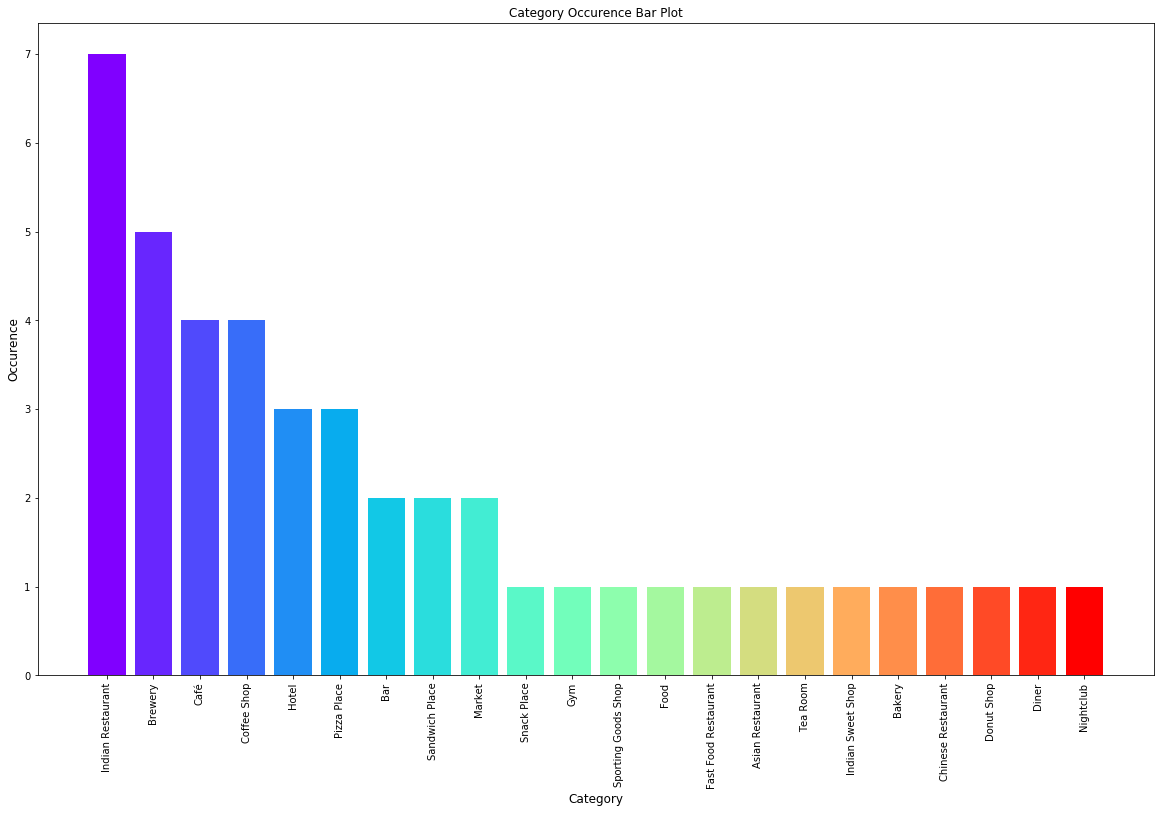

In [20]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Category", fontsize = 12)
plt.ylabel("Occurence", fontsize = 12)
plt.title("Category Occurence Bar Plot", fontsize = 12)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

Above graph will help intended users to identify which particular categories they are intersted in and also, an idea about the city culture and perople's preferences.

### User Rating Analysis

Existing dataframe contains user rating on a scale [1,5]. We have already remove 0-rating outlets from the dataframe.

Text(0.5, 1.0, "Occurence of different venues based upon User's rating")

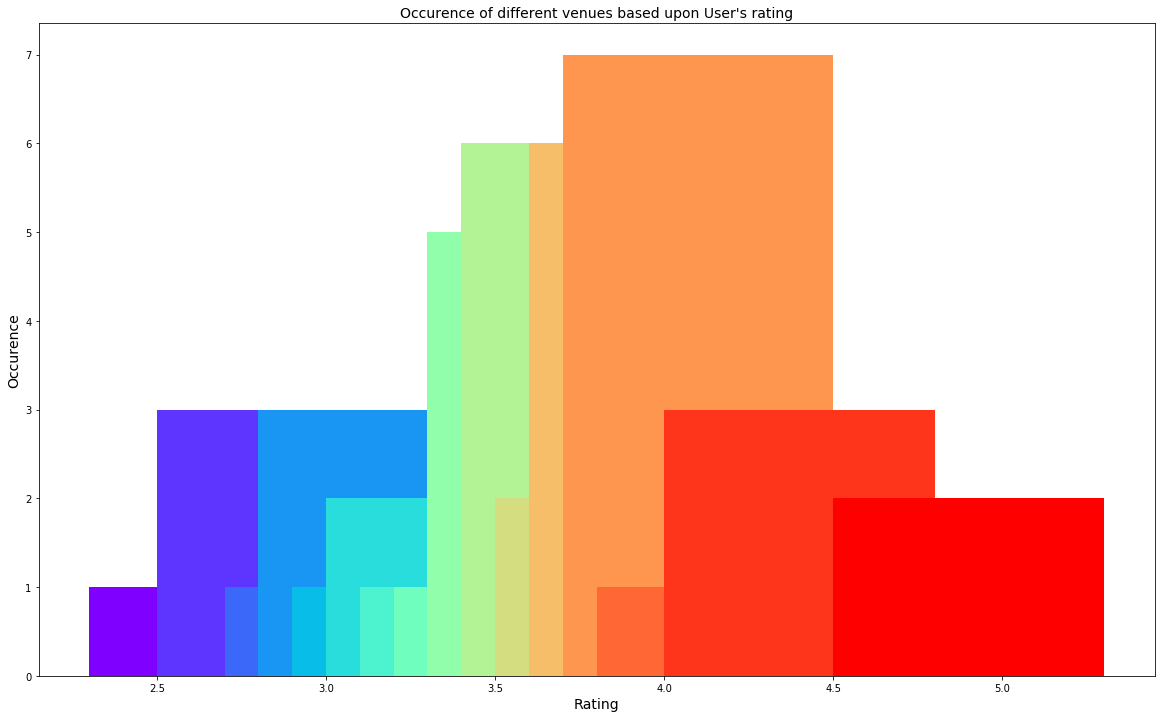

In [21]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 14)
plt.ylabel("Occurence", fontsize = 14)
plt.title("Occurence of different venues based upon User's rating", fontsize = 14)

Above plot indicates majority of venues are falling in the rating **range of (3.5 - 4.5)**

### Rating Bin
Available rating range [1,5] is divided into below four categories
- [1,3] for Low
- [3,3.5] for Average
- [3.5,4] for Good
- [4,5] for Star

In [22]:
bins = [1.0, 3.0, 3.5, 4.0, 5.0]
labels = ['Low', 'Average', 'Good', 'Star']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

Now, we will plot the venues on the map.

In [23]:
color_map = {'Low': 'red', 'Average': 'purple', 'Good': 'green', 'Star': 'darkblue'}

gurugramMap = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(gurugramMap)  

gurugramMap.save("../Gurugram/maps/4_VenuesRatings.png")
gurugramMap

Above map depicts seleted venues in different color markings based upon their ratings.


### Price per person

**FourSquare API** - provided average price per person as shown in a bubbled scatter plot where higher size of points depicts higher price per person

Text(0.5, 1.0, 'Count of venues with given average price')

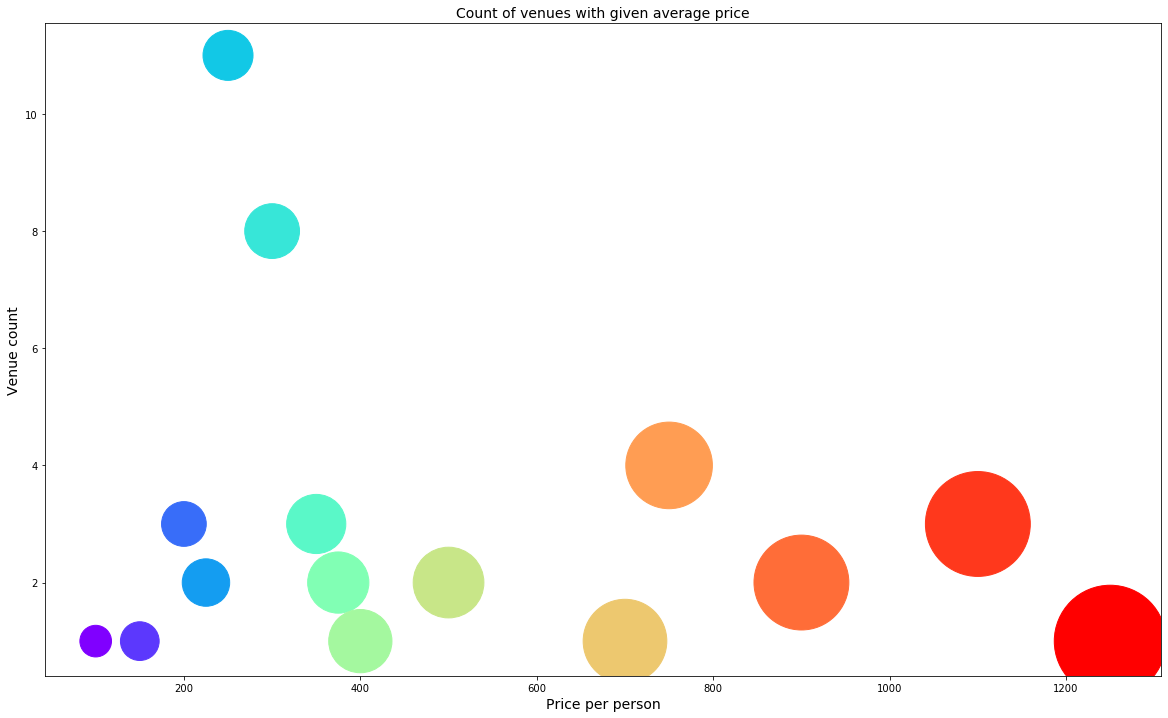

In [24]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 14)
plt.ylabel("Venue count", fontsize = 14)
plt.title("Count of venues with given average price", fontsize = 14)

Above scattered plot indicates maximum venue are around Rs 400 per person. In addition, graphs indicates a promising trends in the range 700-900 as well.

 

We will now take a look the venues based on the price values. We have two price features for our venues, one is `average_price` which defines the average cost for one person and the other is `price_range` which determines the price range as defined by Zomato.

Users might also be interested in going to a place that fits in their budget. I'll use the `price_range` column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.
Foodies or frequent visitors may like to have an analysis based upon price range which is shown in below plot. 

### Venue according to price range

**Zomato API** - provided price range of selected restaurants as shown in below plot

In [25]:
color_map = {'1.0': 'darkgreen', '2.0': 'green', '3.0': 'purple', '4.0': 'red'}

gurugramMap = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(gurugramMap)  

gurugramMap.save("../Gurugram/maps/5_VenueByPriceRange.png")
gurugramMap

Color coding used to indicate price range is **dark green, green, purple and red** where **red** is considered as **most costlier**.
Above graphs indicates the area where different categories of restaurants based upon their price are available.

### Clustering (Locations) using KMeans algorithms

Result set is clustered based upon below criteria to identify different groups. **K-Means** algorithm is being used to make the clusters
- Price Range
- Location

In [26]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Brewery,Downtown - Diners & Living Beer Cafe,28.4683,77.0630,4.0,4.4,"SCO 34, Main Market, Sector 29, Gurgaon",1100.0,Star
1,0,Café,Roots - Cafe In The Park,28.4697,77.0684,2.0,4.1,"Rajiv Gandhi Renewable Energy Park, Leisure Va...",375.0,Star
2,1,Indian Restaurant,Swagath,28.4698,77.0628,3.0,3.7,"SCO 16-17, Main Market, Sector 29, Gurgaon",750.0,Good
3,0,Indian Restaurant,Dana Choga,28.4825,77.0495,2.0,4.9,"5 & 6, Atul Kataria Chowk, Sector 14, Gurgaon",300.0,Star
4,1,Nightclub,Prankster,28.4692,77.0635,3.0,4.1,"Site 8-10, Sector 29, Gurgaon",750.0,Star


In [27]:
gurugramMap = folium.Map(location = [latitude, longitude], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(gurugramMap)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(gurugramMap)

gurugramMap.save("../Gurugram/maps/6_VenuesClusters.png")
gurugramMap

**Two Main clustered observed** - one near sector 29 and other one near Sector 15

### Identifying venue parameters for different Clusters

**Cluster 1** : 

In [28]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print(" Top 10 venues inside cluster 1")
result.head(10).reset_index(drop = True)

 Top 10 venues inside cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Café,Roots - Cafe In The Park,28.4697,77.0684,2.0,4.1,"Rajiv Gandhi Renewable Energy Park, Leisure Va...",375.0,Star
1,0,Indian Restaurant,Dana Choga,28.4825,77.0495,2.0,4.9,"5 & 6, Atul Kataria Chowk, Sector 14, Gurgaon",300.0,Star
2,0,Indian Restaurant,Om Sweets & Snacks,28.4736,77.0479,2.0,4.1,"84-85, Shopping Complex, Sector 14, Gurgaon",250.0,Star
3,0,Indian Restaurant,Bikanervala,28.4690,77.0637,2.0,4.0,"Plot 3-5, Near Leisure Valley Park, Sector 29,...",300.0,Good
4,0,Sporting Goods Shop,Burger Hut,28.4275,77.0362,1.0,3.8,"Shop 15, 1st Floor, Omaxe Celebration Mall, So...",150.0,Good
5,0,Coffee Shop,Starbucks Coffee,28.4586,77.0725,2.0,4.0,"Ground Floor, South Wing, HUDA City Centre Met...",300.0,Good
6,0,Sandwich Place,Subway,28.4541,77.0514,2.0,3.7,"SCO 46, Ground Floor, Sector 31, Gurgaon",250.0,Good
7,0,Brewery,Adda by Striker,28.4690,77.0623,3.0,4.1,"SCO 24, 1st Floor, Main Market, Sector 29, Gur...",500.0,Star
8,0,Gym,3 And A Half Cafe,28.4687,77.0442,2.0,3.2,"729, 3rd Floor, Gold's Gym, Near Kalyani Hospi...",250.0,Average
9,0,Indian Restaurant,Sagar Ratna,28.4210,77.0383,2.0,3.7,"Plot 12-D, Ground Floor, JMD Galleria, Sohna R...",375.0,Good


In [29]:
print("Cluster 1 Details")
print("Average Price Range: {:.02f}".format(result['price_range'].mean()))
print("Venue Rating : {:.02f}".format(result['rating'].astype(float).mean()))

Cluster 1 Details
Average Price Range: 1.85
Venue Rating : 3.76


**Cluster 2** : 

In [30]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print(" Top 5 venues inside cluster 2")
result.head(5).reset_index(drop = True)

 Top 5 venues inside cluster 2


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Brewery,Downtown - Diners & Living Beer Cafe,28.4683,77.0630,4.0,4.4,"SCO 34, Main Market, Sector 29, Gurgaon",1100.0,Star
1,1,Indian Restaurant,Swagath,28.4698,77.0628,3.0,3.7,"SCO 16-17, Main Market, Sector 29, Gurgaon",750.0,Good
2,1,Nightclub,Prankster,28.4692,77.0635,3.0,4.1,"Site 8-10, Sector 29, Gurgaon",750.0,Star
3,1,Bar,Downtown - Diners & Living Beer Cafe,28.4683,77.0630,4.0,4.4,"SCO 34, Main Market, Sector 29, Gurgaon",1100.0,Star
4,1,Brewery,My Bar Headquarters,28.4680,77.0642,3.0,4.0,"SCO 53, Sector 29, Gurgaon",750.0,Good


In [31]:
print("Cluster 2 Details")
print("Average Price Range: {:.02f}".format(result['price_range'].mean()))
print("Venue Rating : {:.02f}".format(result['rating'].astype(float).mean()))

Cluster 2 Details
Average Price Range: 3.36
Venue Rating : 3.85


#### Results <a name="results"></a>

* **Foodies** who want to try out new food place and like to identify best restaurant of their budget and preferences.
    **Foodies** can easily locate restaurant venue based upon:
    1. Area proximity
    2. Budget which suits them
    3. Venue category like pizza, Indian cuisines, Cafe etc 
    
* **Investors** who want to start a new establishment and want to compare restaurants in particular area
    1. Existing restaurant to have an idea of their competitors
    2. Average price reflects type of user base which are available in that area.
    3. Venue category like pizza, Indian cuisines, Cafe etc could hint them the cuisine which they should or should not pick.

* **Food Critics** who may use this prototype, enhance and customize its functionality and develop it further for their commercial usage.
    1. User ratings can help critics writing a review of restaurant.
    2. Price range may support critics in their review writing. 

**Examples**

* Maximum number of restaurants: Cluster 1 & Cluster2 :: Sector 29, Sector 15
* Around 70% venues in the range below Rs 600 :: Source : Bubble scatter graph
* Top 10 rating restaurant : Refer section Cluster 1, 2
* Venue locations in City and their average price : Refer Map in 'Rating Bin'


## Conclusion <a name="conclusion"></a>
Above analysis is providing meaningful details to intended stakeholders i.e.Foodies, Investors and Food Critics. Details of this is already covered in 'Result section' above. 
This analysis can further be enhanced with venue sales records data to decide future scope of enhancement, people choice in menu etc as more independent variables and could be helpful in defining  success factor to open a particular category of restaurant in a particular area.


**Report Submitted By** : **Vishal Nagpal**

